# Raspberry Pi_3

# 6.슈퍼컴퓨터 구축 (클러스터)

## 6.1 MicroSD카드의 백업
지난 시간에 설명한 개념. <br>
***Win32DiskImager***를 사용하며, 파이의 sd카드의 데이터를 이미지 형태로 백업해 뒀다가 추후 클러스터링할 다른 파이의 sd카드에 입힐 것이다.
***Win32DiskImager***를 실행하면 다음과 같다. <br>

------------------------------------
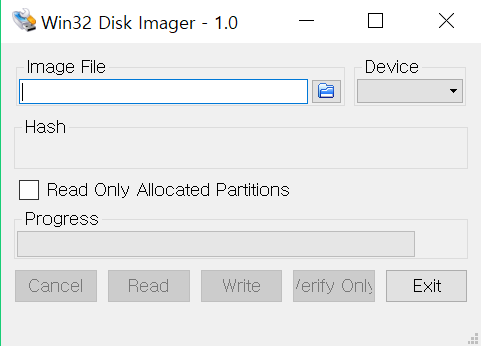


------
원하고자 하는 백업 경로에 빈 텍스트 파일을 하나 만들어서 확장자명을 .img나 .IMG 확장자를 추가한다.


------
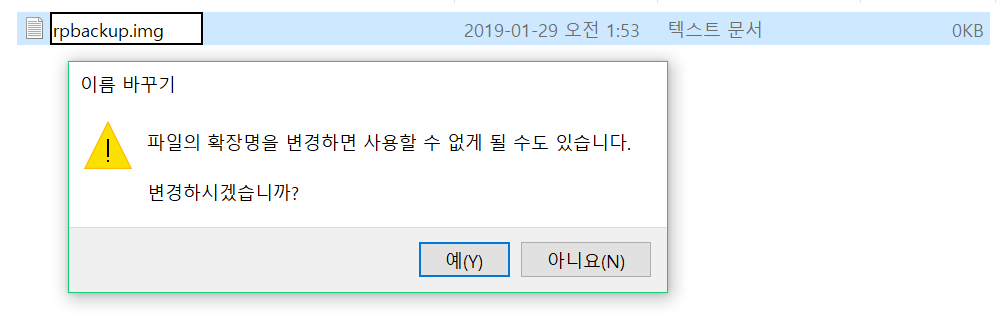

--------

그런 다음 백업할 파일을 선택한 후 READ 버튼을 클릭하면 백업이 된다.

----------
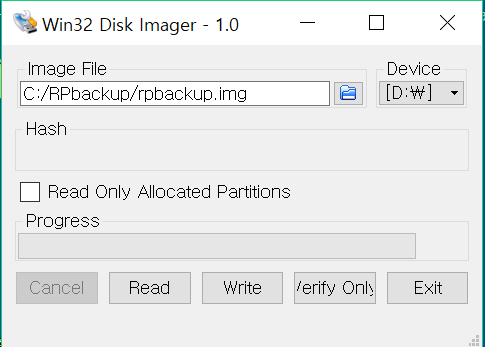

------------
클러스터는 기본적으로 5장에서 배운 MPI를 기반으로 프로세서 간의 데이터를 주고받는다. 여기서 우리는 고성능 컴퓨팅에서 주로 사용되는 파이썬을 더한 MPI4PY (MPI for PYTHON)를 사용할 것이다. 그리고 클러스터 설정 시 필요한 각 파이의 ip주소를 쉽게 알기 위해 nmap이라는 프로토콜도 설치할 것이다.<br>

이처럼 각 파이의 sd카드마다 같은 작업을 반복하면 효율이 떨어지므로, 위에 나온 백업을 이용하면 쉽게 클러스터링 준비를 할 수 있다.<br>

다음은 초기 구성품들이다. 이를 이용해 파이 4개를 연결한 클러스터를 구성해 보자.

-----------------------------
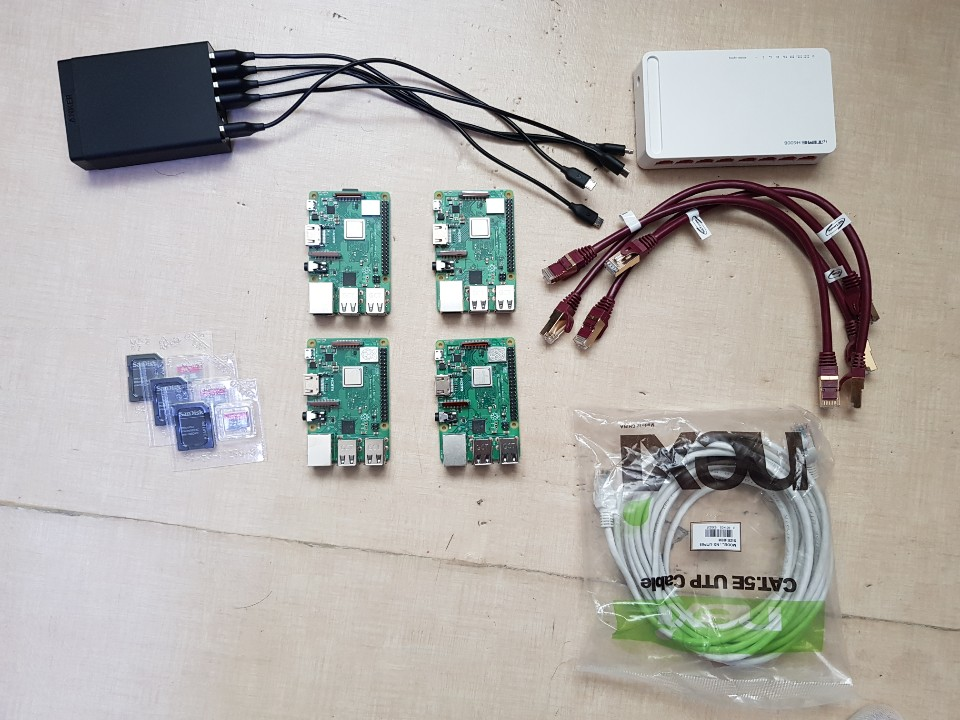

----------------------------
보통 클러스터 스택(층을 쌓는 것)을 구성할 때는 아크릴판과 스탠드오프(긴 막대형 볼트)를 이용한다. 사정상 아크릴판은 구하지 못했으므로 스탠드오프만을 이용하여 스택을 쌓아 보자. 다음은 4층 중 2층을 완성한 상태의 스택이다.

----------------------------
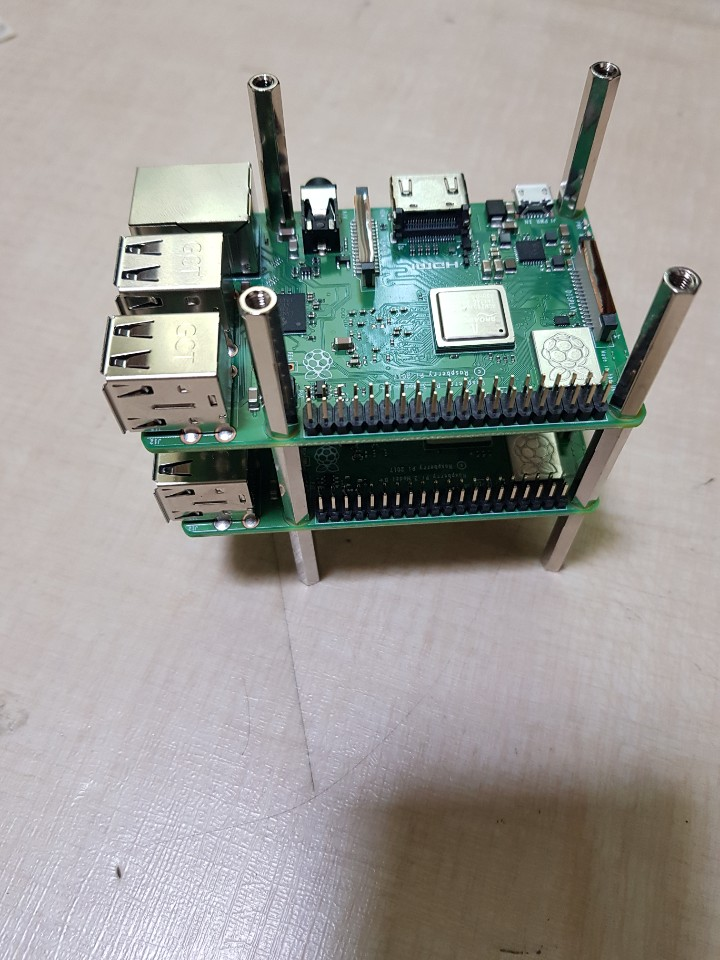

----------------------------
다음은 랜케이블과 충전포트까지 모두 연결하여 구동 중인 4층짜리 완성본이다.

---------------------------
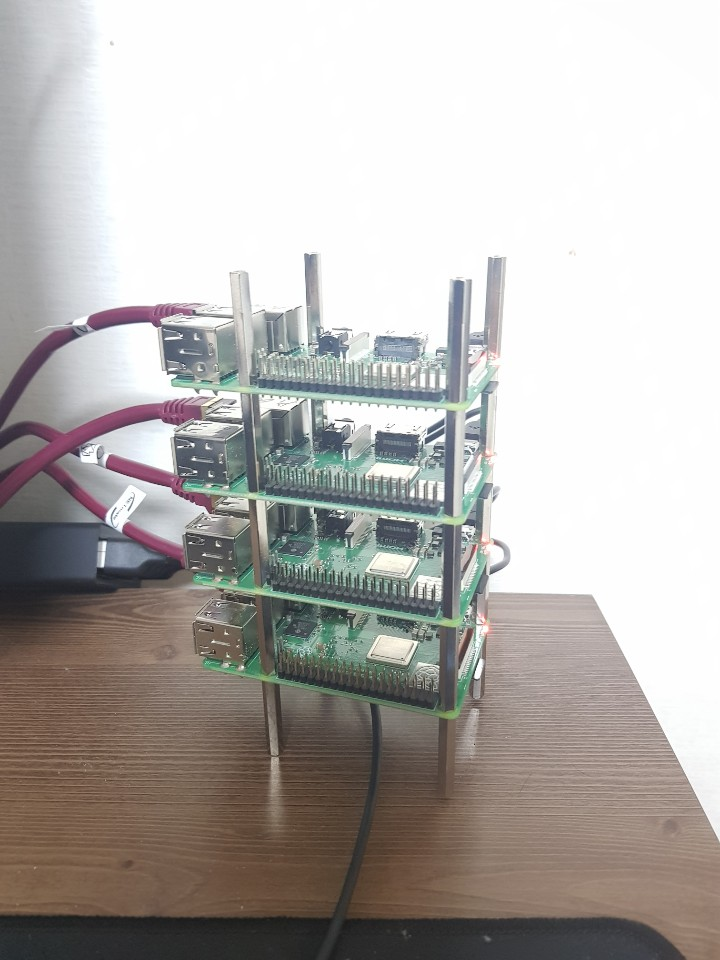

## 6.2 슈퍼컴퓨터의 노드 준비
쉽게 말해 각각의 파이에 백업해 두었던 데이터를 모두 입히고, 사용자가 식별하기 편하도록 이름을 달아주는 것을 말한다. 우리는 5장에서 파이의 sd카드에 MPI4PY, nmap을 설치했었다. 그대로 나머지 3개의 파이에 입히고 구동이 잘 되는 것을 확인한 뒤 이름을 달아주도록 하자. 보통 기본이름은 raspberryPi로 되어 있을 것이다. LXTermial 에서 다음 명령을 실행하면, 해당 파이의 소프트웨어 구성 툴을 볼 수 있다. 쉽게 말해 pc의 바이오스 메뉴이다.

----------------------------------------------------------------------
```sudo raspi-config```

-------------------------------------------------------------------------
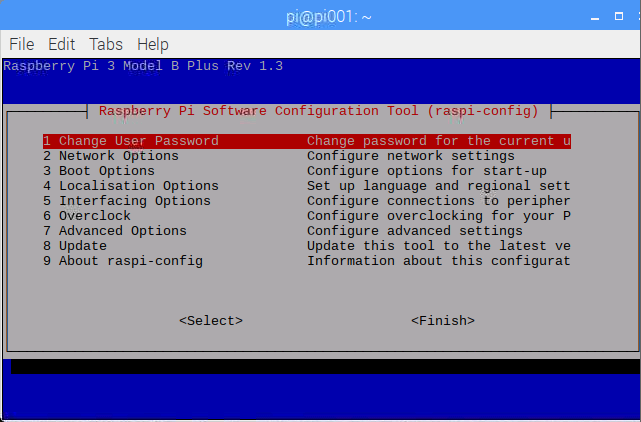

-------------------------------------
2번의 network options으로 들어가면 hostname이라는 항목이 있고, 이를 클릭하면 파이의 이름을 바꿀 수 있다. 앞으로 이 파이를 마스터노드로 사용할 것이므로 pi001로 지어주자. 같은 방법으로 나머지 노드에도 pi002,pi003,pi004의 이름을 붙여주었다.
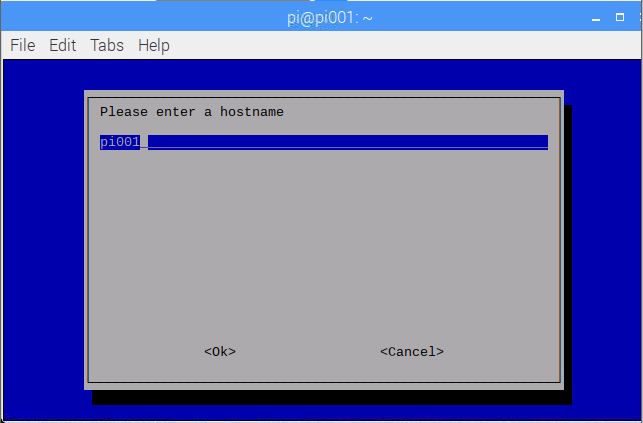

## 6.3 파이들의 네트워크
클러스터를 구성하려면 당연히 어떤 방법으로든 각 노드들이 연결되어 있어야 한다. 가장 간편한 방법은 네트워크 라우터(허브)를 이용하는 방법이다. 

----------------------------------

네트워크 허브를 파이에 연결하고 메인 랜선을 공유기에 연결한다. 네트워크 라우터가 iptime 공유기에 연결되어 있으므로 iptime 관리 콘솔로 들어가 보자. (192.168.0.1)

------------------------------------
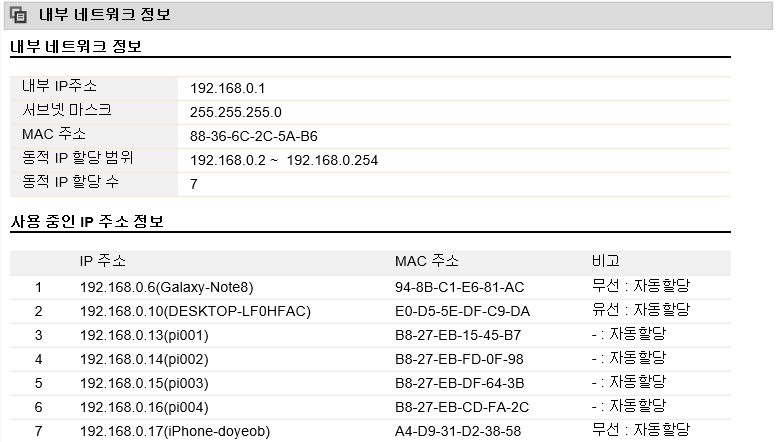

-------------------------------
원래는 nmap을 이용하여 각 파이의 ip를 찾을 수 있으나, 이렇게 해도 연결된 파이의 ip주소를 알 수 있다. 그럼 nmap으로는 어떻게 찾을 수 있는지 알아보자. lxterminal에 다음 명령어를 입력한다. ip주소의 첫 세 클래스는 사용하는 네트워크 환경에 따라 달라질 수 있다.

----------------------------------------------------------------------
```sudo nmap -sn 192.168.0.*```

-------------------------------------------------------------------------
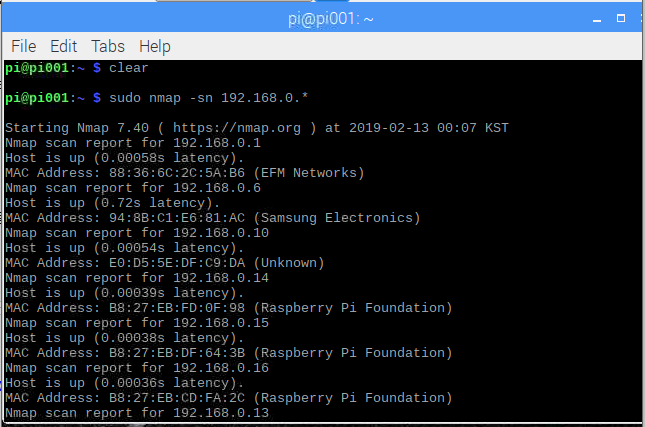

--------------------------------------------------
관리 콘솔에서 찾을 수 있는 결과와 동일함을 알 수 있다. 앞으로 pi001은 D클래스가 13, pi002는 14, pi003은 15, pi004는 16으로 통칭하도록 한다.

## 6.4 mpirun으로 멀티파이에서 호스트 이름 명령어 실행
이제 네트워크 연결로 실질적인 클러스터를 구성하는 과정이다. 우선 다른 작업 없이 그냥 네트워크에 걸린 상태로 아이피만 넣어서 작업을 시켜 보자. 마스터노드인 pi001에서 다음과 같은 명령어를 실행하여 위에서 찾은 ip를 모두 입력한다. 이는 myhostfile에 각 파이의 ip를 입력하기 위한 것이고, 병렬 처리할 클러스터의 각 노드 리스트를 넣은 것으로 보면 된다.

----------------------------------------------------------------------
```nano myhostfile```

-------------------------------------------------------------------------
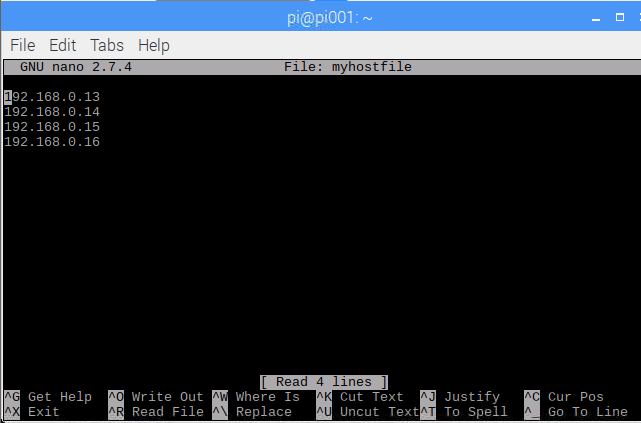

-------------------------------------
입력 후 crtl+6 후 crtl+x를 누르고 yes를 입력하고 엔터를 누르면 pi001의 /home/pi 디렉토리에 각 노드의 ip정보를 가진 myhostfile이라는 파일이 생성된다. 이를 pi002, pi003, pi004에도 똑같이 만든 후 다음 명령어를 입력해 보자.
이는 위에서 작성했던 myhostfile을 진행하는데 사용된 노드의 hostname을 반환한다고 보면 된다. (오류를 출력하기 위해 마스터노드가 아닌 pi002에서 진행했다.)

----------------------------------------------------------------------
```mpirun -hostfile myhostfile -np 4 hostname```

----------------------------------------------------------------------
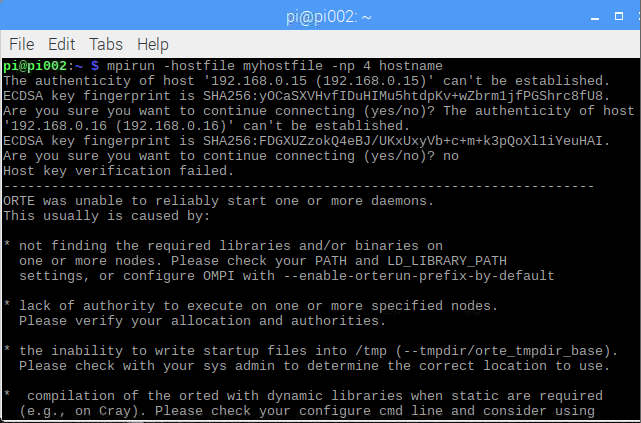

--------------------------------
오류가 출력된다. 이는 인증 없이 원격으로 pi001에서 pi002, pi003, pi004에 명령을 실행하려고 하기 때문이다. 이에 필요한것이 ssh-keygen이라는 인증 유틸리티이다. 보통 윈도우에서 keygen이라는 것은 CD key를 의미하는데, 리눅스에서도 비슷한 의미이다. 리눅스 호스트 간의 랜덤 인증 key를 생성해서 주고받는 유틸리티라고 보면 된다. 한번 입력해 놓으면 다음부터는 특별한 제약 없이 프로세서 간의 데이터 전송이 가능하다. 명령어는 다음과 같다.

------------------------------------------------------------
``` ssh-keygen ```

------------------------------------------------------

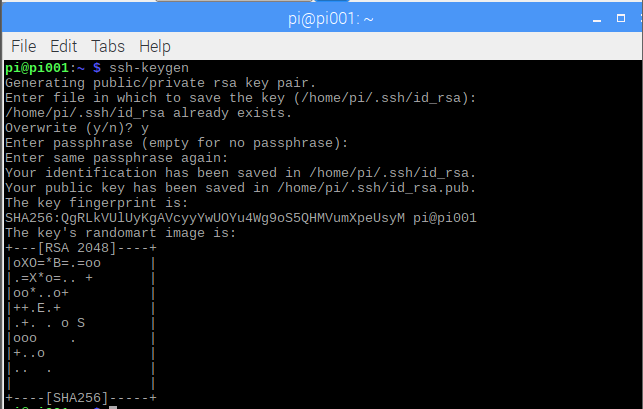

이를 실행하면 pi001호스트의 개인 key와 공개 key가 생성된다. 아래에 보이는 박스가 랜덤으로 생성되는 key 이미지이고, 매번 할때마다 다른 key가 생성된다. 이 key는 /home/pi의 /.ssh라는 숨겨진 디렉토리에 저장된다. 이 디렉토리로 이동하여 공개 key를 pi01이라는 이름으로 복사하자. 명령어는 다음과 같다.

----------------------------------------------------------------------
```cd. ssh``` <br>
```cp id_rsa.pub pi01 ```

-------------------------------------------------------------------------

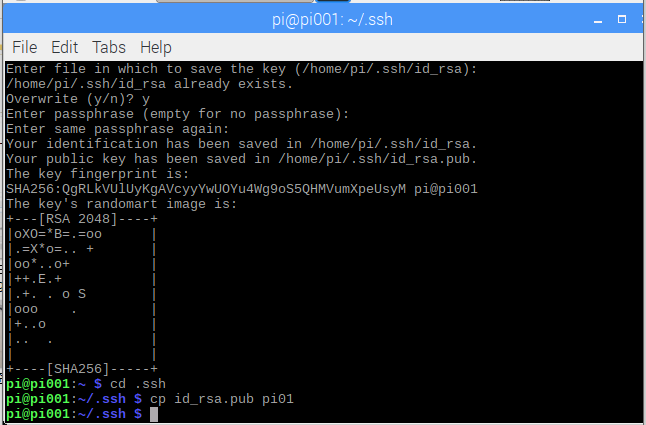

--------------------------
이제 pi001의 공개 인증key를 pi01이라는 이름으로 만들었다.이 내용을 다른 호스트(노드)의 authorized_keys 파일에 추가해야 한다. (이는 각 노드의 키 설정 중 가장 마지막에 진행할 것이다.) 다음 명령으로 pi002에 접속하자. 위에서 pi002의 ip D클래스는 .14 였으므로 명령어는 다음과 같다.

---------------------------
```ssh pi@192.168.0.14``` <br>

-------------------------------------------------------------------------
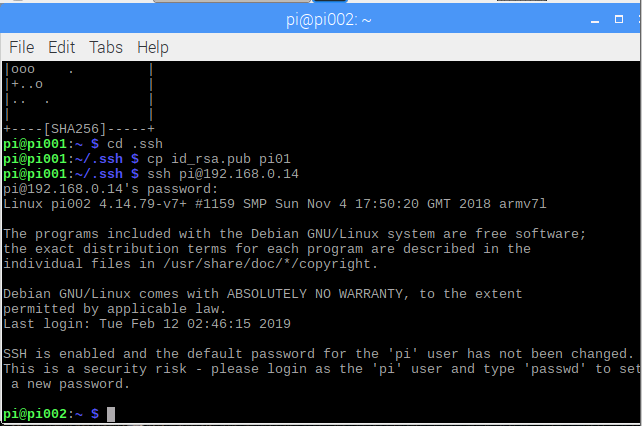

----------------------------------
pi002에 접속했다. (보통 기본 패스워드는 'raspberry'로 저장되어 있다.) 위에서 했던 것과 마찬가지로 pi002의 공개 key를 생성하고 복사한 뒤, scp명령어를 사용해서 pi001의 공개인증 key를 pi002에 복사하고, pi01로 만들어두었던 공개 key를 authorized_keys에 추가한다.

---------------------------
```scp 192.168.0.13:/home/pi/.ssh/pi01 .``` <br>
```cat pi01 >> authorized_keys .```

-------------------------------------------------------------------------
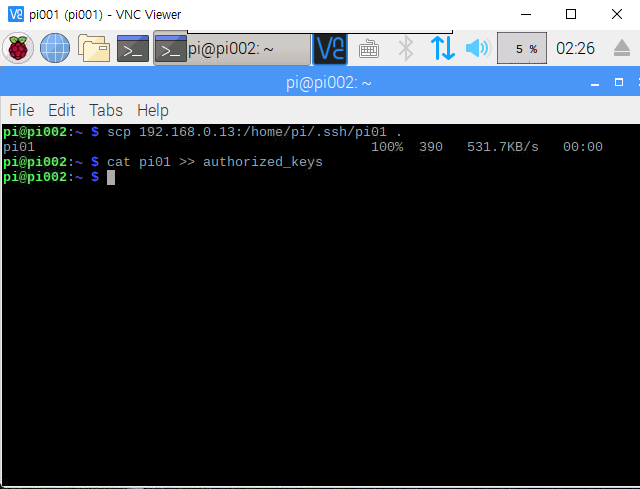

------------------------------

exit 또는 logout을 이용해 마스터노드 pi001로 돌아온다. 여기까지가 pi001과 pi002의 공개인증 key를 주고받은 것이고, 같은 방식으로 pi001과 pi003, pi004와도 인증 key를 주고받으면 된다. 이 과정이 완료되었으면 pi001에서 인증 key를 받는 과정이 필요하다. 마찬가지로 scp와 cat 명령어를 사용한다.

---------------------------------------
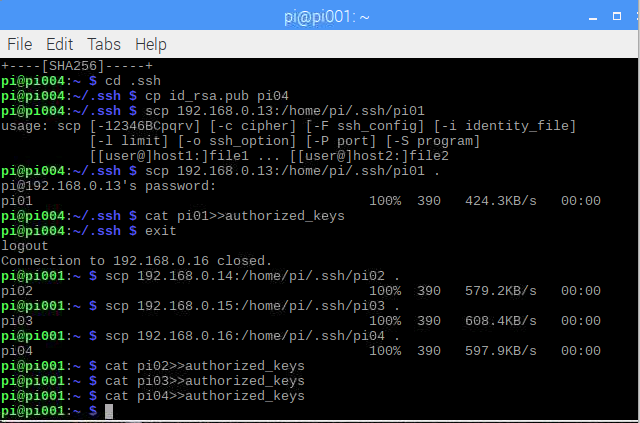

---------------------------

이제 각 노드 간의 키 인증이 끝난 것이고, 네트워크 상에서 mpi를 이용한 프로세서 간의 데이터 전송이 자유롭게 이루어질 것이다. 클러스터 설정이 완료된 것을 테스트하기 위해 다음 명령어를 입력해 보자.

-----------------------------
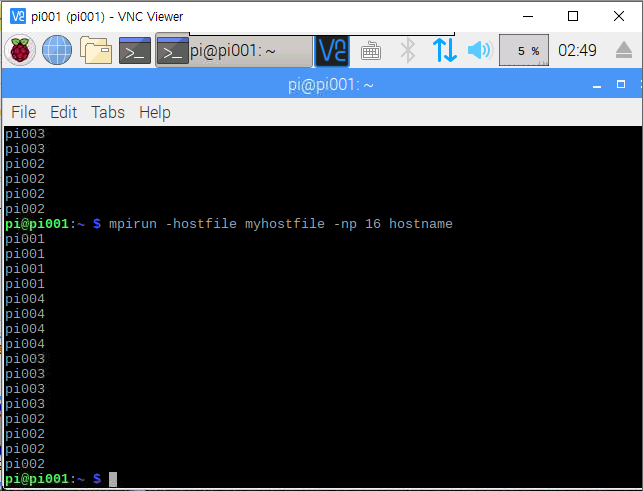

-------------------------------------
연산 또는 작업을 실행한 노드의 hostname이 16번 나오는 것을 알 수 있다. 

## 6.5 간단한 파이썬 연산 실행
위에서 각 노드에 'myhostfile' 이라는 파일을 같은 경로에 저장했었다. 마찬가지로 다음과 같은 파이썬 파일을 각 노드의 같은 경로에 두고 반복시행하며 cpu로드율을 살펴보자. 파일 이름은 green.py이고, 경로는 /home/pi 이다.

In [4]:
import time # 연산에 걸리는시간을 측정하는 코드
start_time = time.time()

i = 0

while i < 70000: # 아래의 코드를 70000번 반복하게 되는 조건문
    a = 1000000
    b = 12+5
    c = a*b
    print(c)
    i += 1

print("start_time", start_time)
print("--- %s seconds ---" %(time.time() - start_time))

17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
1

17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
1

17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
1

17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
1

17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
1

17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
1

17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
1

17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
1

17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
1

17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
1

17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
1

17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
1

17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
1

17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
1

17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
1

17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
1

17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
1

17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
1

17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
1

17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
1

17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
1

17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
1

17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
1

17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
1

17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
1

17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
1

17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
1

17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
1

17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
1

17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
1

17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
1

17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
1

17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
1

17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
1

17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
1

17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
1

17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
1

17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
1

17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
1

17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
1

17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
1

17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
1

17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
1

17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
1

17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
1

17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
1

17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
1

17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
1

17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
1

17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
1

17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
1

17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
1

17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
1

17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
1

17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
1

17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
1

17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
1

17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
1

17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
1

17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
1

17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
1

17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
1

17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
1

17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
1

17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
1

17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
1

17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
17000000
1

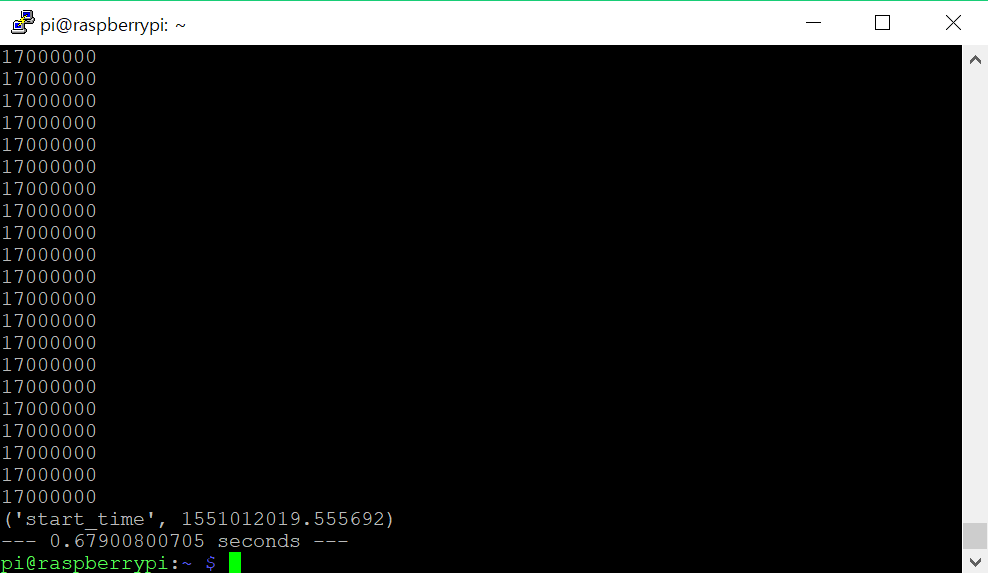

위 결과는 싱글노드일 때 green.py를 실행한 결과이다. 70000번 연산하는데 약 0.679초가 걸렸다.

명령어는 다음과 같다. cpu 로드율은 vnc에서 한눈에 확인할 수 있다. 횟수를 늘릴수록 cpu 로드율도 많이 올라가므로 700회정도 반복해 보자.

---------------------------
```mpirun -hostfile myhostfile -np 700 python green.py```

-------------------------------------------------------------------------
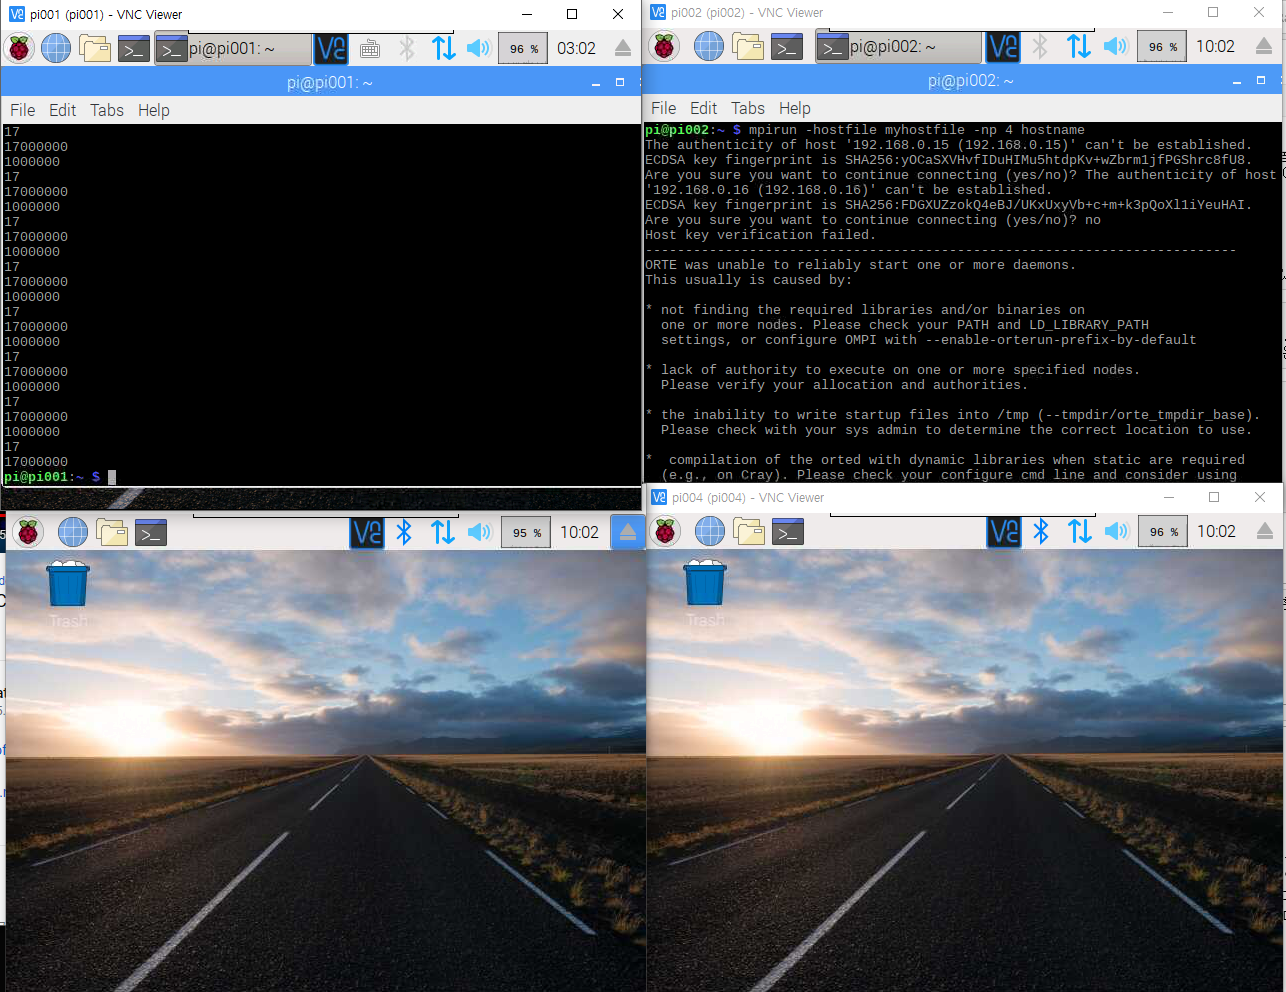

--------------------------------------
어림짐작으로 대략 1초정도 걸리고, 로드율은 4개의 노드 모두 96%정도로 올라가는 것을 확인할 수 있다.

# 6장 마무리 <br>

이로써 4개의 라즈베리파이 b+모델을 클러스터링하여 병렬 연산이 가능한지를 확인해 보았다. <br>
클러스터를 구성하면서 알게 된 문제점으로는 우선 고정된 ip를 사용하지 않거나, 작업하는 장소가 달라지게 되면 ip 자체가 달라지기 때문에 지금까지 했던 네트워크 설정, 키 생성, 복사 등을 처음부터 다시 해야 한다는 점이다. <br>
또한 지금까지 별 작업을 하지 않았는데도 4대를 연결하니 발열이 생각보다 심하다. 7장이 오버클럭 내용이고 8장 이후는 파이썬 연산이 주된 내용인데, 오버클러킹은 고사하고 당장 연산도 무리가 있을 것 같다. 방열판이나 쿨러를 달거나 하다못해 선풍기라도 둬야하지 않을까 싶다.

